In [ ]:
pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "postgres",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


In [4]:
cur = con.cursor()
st = '''select  t.year,t.month ,i.item_key, sum(ft.total_price) 
               from ecomdb_star_schema.fact_table ft 
               join ecomdb_star_schema.time_dim t on t.time_key = ft.time_key
               join ecomdb_star_schema.item_dim i on i.item_key = ft.item_key
               group by (i.item_key,t.year,t.month)
               order by (i.item_key,t.year,t.month) '''
cur.execute(st)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['year', 'month' ,'item_id','total_sales'])
#df.head()
df.dropna()

,year,month,item_id,total_sales
0,2014,1,I00001,1518.0
1,2014,2,I00001,2794.5
2,2014,3,I00001,2921.0
3,2014,4,I00001,3737.5
4,2014,5,I00001,2679.5
...,...,...,...,...
22435,2020,9,I00264,4155.0
22436,2020,10,I00264,6315.0
22437,2020,11,I00264,2910.0
22438,2020,12,I00264,6390.0


In [5]:
df2=df
b=df.copy()
c=df.copy()
d=df.copy()
e=df.copy()
#df=df.values

In [6]:
b['month'] = b['month'].replace(1, 'January')
b['month'] = b['month'].replace(2, 'February')
b['month'] = b['month'].replace(3, 'March')
b['month'] = b['month'].replace(4, 'April')
b['month'] = b['month'].replace(5, 'May')
b['month'] = b['month'].replace(6, 'June')
b['month'] = b['month'].replace(7, 'July')
b['month'] = b['month'].replace(8, 'August')
b['month'] = b['month'].replace(9, 'September')
b['month'] = b['month'].replace(10, 'October')
b['month'] = b['month'].replace(11, 'November')
b['month'] = b['month'].replace(12, 'December')

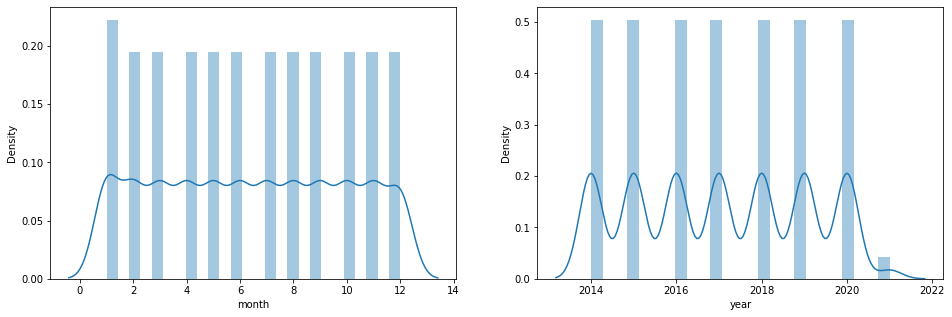

In [7]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(c['month'])
plt.subplot(1,2,2)
sns.distplot(b['year'])
plt.show()

<AxesSubplot:xlabel='month', ylabel='count'>

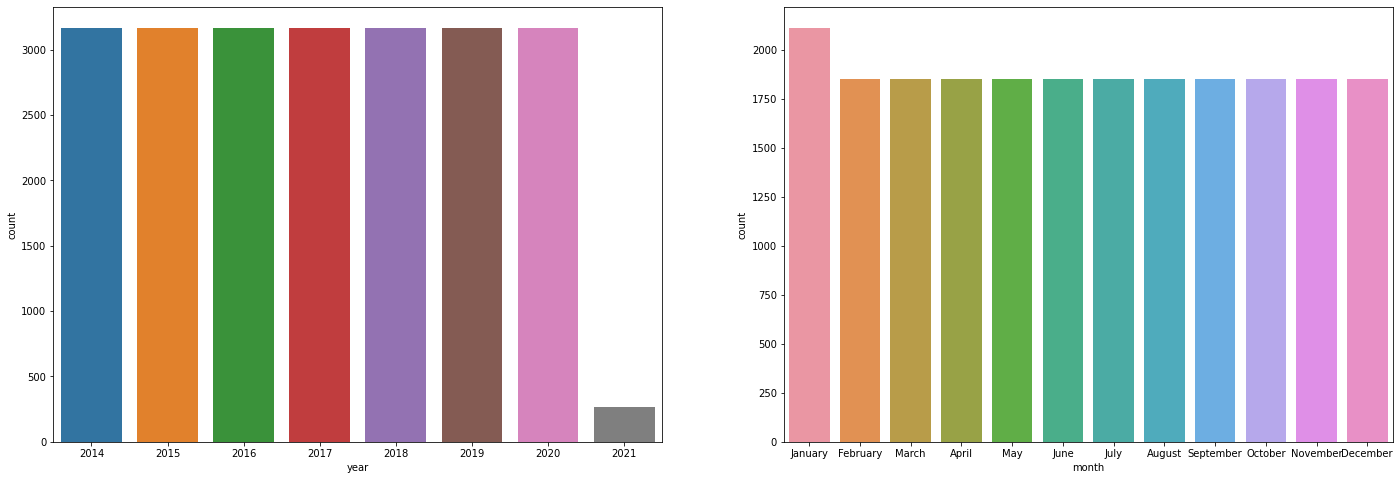

In [8]:
plt.figure(figsize = (24,8))
plt.subplot(1,2,1)
sns.countplot(x=b['year'])
plt.subplot(1,2,2)
sns.countplot(x=b['month'])

# Data Pre Processing

# Checking for null value

In [9]:
df.isnull().sum()

year           0
month          0
item_id        0
total_sales    0
dtype: int64

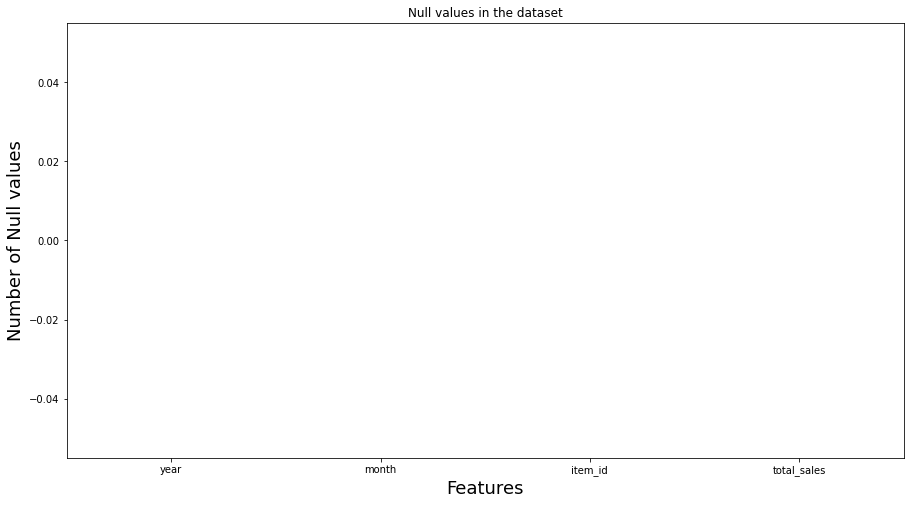

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

null_value = df.isnull()
plt.figure(figsize = (15,8))
sns.barplot(data=null_value)
plt.xlabel('Features',fontsize=18)
plt.ylabel('Number of Null values',fontsize=18)
plt.title("Null values in the dataset")
plt.savefig('Checking for null values')

plt.show()

# Outlier detection

<AxesSubplot:>

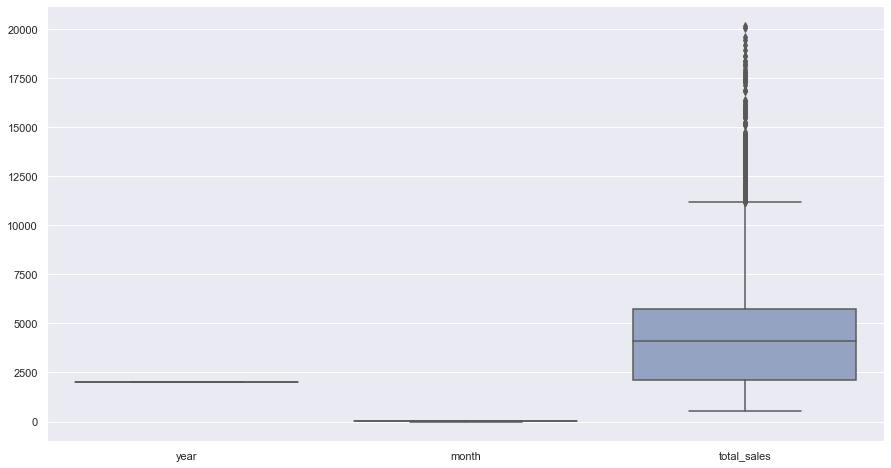

In [11]:
#boxplot for data with outliers
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(data=df2.iloc[0:6999,0:4],palette="Set2")
#df.head
#print(newdf.iloc[0,0:6])

In [12]:
#finding first and last index of every itemid
ind=d.index.to_series().groupby(d['year']).agg(['first','last']).reset_index()
print(ind)

   year  first   last
0  2014      0  22366
1  2015     12  22378
2  2016     24  22390
3  2017     36  22402
4  2018     48  22414
5  2019     60  22426
6  2020     72  22438
7  2021     84  22439


In [ ]:
#detecting and replacing outliers by mean
for m in range(2014,2022):
    A = e.loc[e['year'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,3):
        #print("For i=i.value")
        Avg= np.mean(A.iloc[:,i])
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                #print(newdf.iloc[ami,i])
                df.iloc[ami,i] = Avg
                #print(Avg)
                #print(newdf.iloc[ami,i])
                f=f+1
      #C= A.replace(((A.iloc[ami,i] < (Q1 - 1.5 * IQR)) |(A.iloc[:,i] > (Q3 + 1.5 * IQR))), Avg)
        print(f)
    if(p<13):
        p=p+1

In [13]:
c=e

In [14]:
c.total_sales=c['total_sales'].astype('float64')

In [15]:
c.dtypes

year             int64
month            int64
item_id         object
total_sales    float64
dtype: object

In [16]:
print("Highest allowed",c['total_sales'].mean() + 3*c['total_sales'].std())
print("Lowest allowed",c['total_sales'].mean() - 3*c['total_sales'].std())

Highest allowed 12278.770473391647
Lowest allowed -2884.7031159941434


In [17]:
c['total_sales'].describe()

count    22440.000000
mean      4697.033679
std       2527.245598
min        420.000000
25%       3234.000000
50%       4230.000000
75%       5400.000000
max      21200.000000
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='total_sales'>

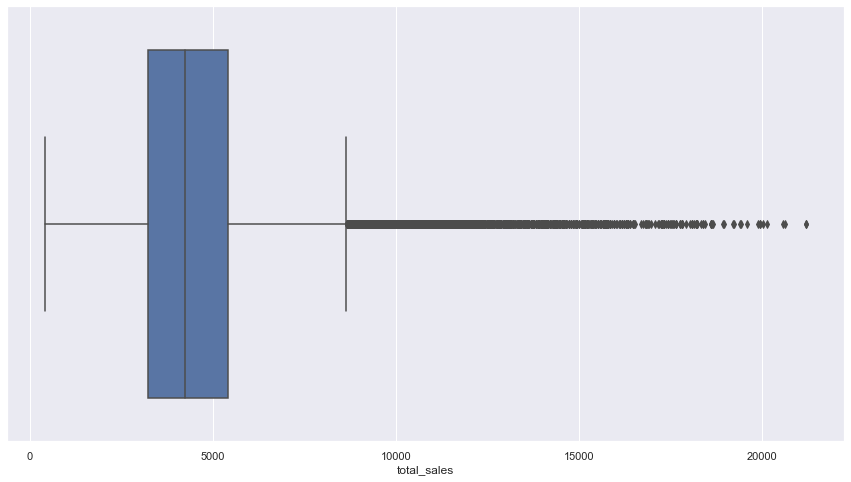

In [18]:
sns.boxplot(c['total_sales'])

In [19]:
# Capping on Outliers
upper_limit = c['total_sales'].mean() + 3*c['total_sales'].std()
lower_limit = c['total_sales'].mean() - 3*c['total_sales'].std()

print(upper_limit)
print(lower_limit)

12278.770473391647
-2884.7031159941434


In [20]:
new_df2 = c[c['total_sales'] < upper_limit]
new_df2.shape

(21889, 4)

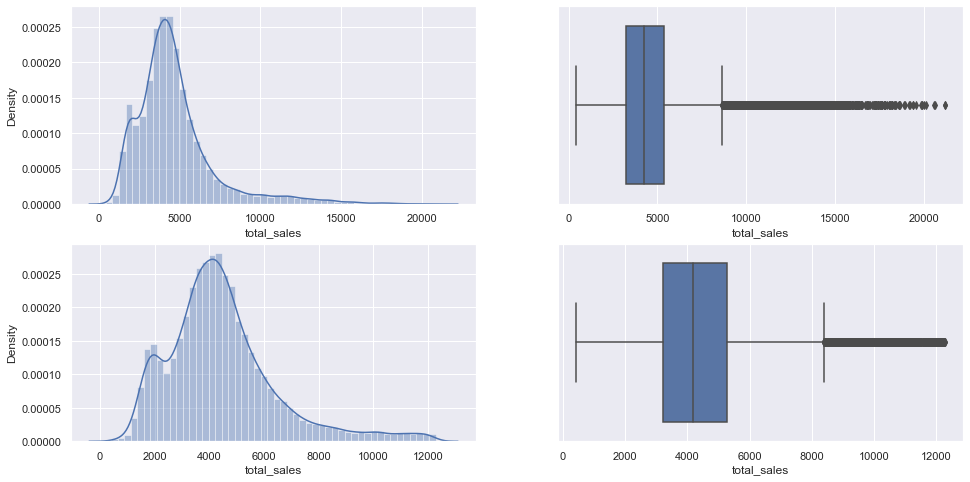

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(c['total_sales'])
plt.subplot(2,2,2)
sns.boxplot(c['total_sales'])
plt.subplot(2,2,3)
sns.distplot(new_df2['total_sales'])
plt.subplot(2,2,4)
sns.boxplot(new_df2['total_sales'])
plt.show()

In [22]:
new_df_cap =c.copy()
new_df_cap['total_sales'] = np.where(
    new_df_cap['total_sales'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['total_sales'] < lower_limit,
        lower_limit,
        new_df_cap['total_sales']
    )
)

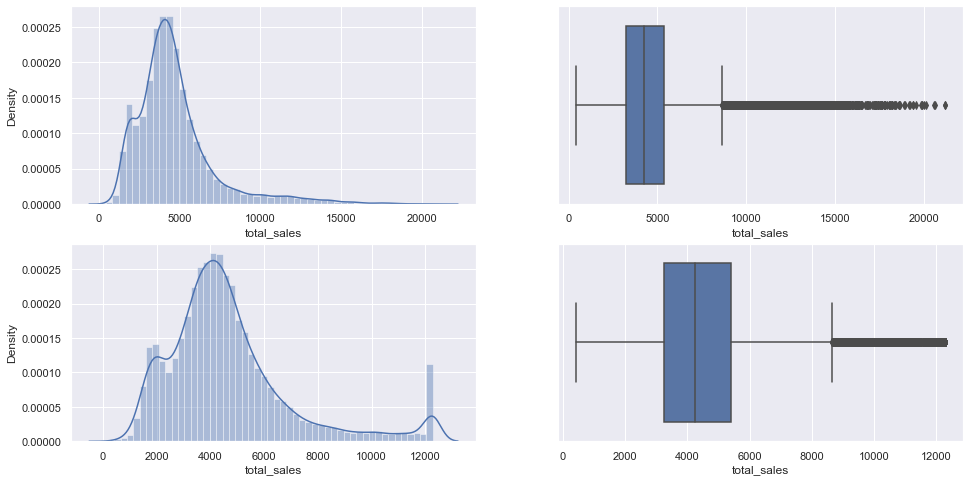

In [23]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(c['total_sales'])
plt.subplot(2,2,2)
sns.boxplot(c['total_sales'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['total_sales'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['total_sales'])
plt.show()

In [24]:
c['total_sales'].describe()

count    22440.000000
mean      4697.033679
std       2527.245598
min        420.000000
25%       3234.000000
50%       4230.000000
75%       5400.000000
max      21200.000000
Name: total_sales, dtype: float64

In [25]:
new_df_cap['total_sales'].describe()

count    22440.000000
mean      4643.005360
std       2315.570551
min        420.000000
25%       3234.000000
50%       4230.000000
75%       5400.000000
max      12278.770473
Name: total_sales, dtype: float64

In [27]:
df =new_df_cap

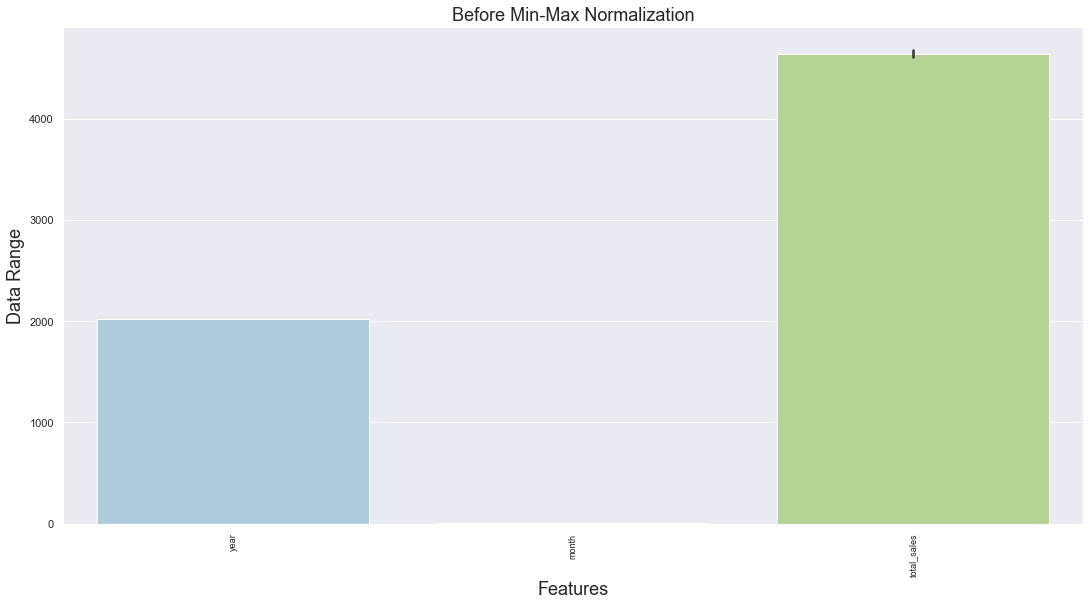

In [28]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df,palette='Paired')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 9)
plt.tight_layout()
plt.xlabel('Features',fontsize=18)
plt.ylabel('Data Range',fontsize=18)
plt.title("Before Min-Max Normalization",fontsize=18)
#plt.savefig('Checking for null values')

plt.show()

In [29]:
dff=d
dff

,year,month,item_id,total_sales
0,2014,1,I00001,1518.0
1,2014,2,I00001,2794.5
2,2014,3,I00001,2921.0
3,2014,4,I00001,3737.5
4,2014,5,I00001,2679.5
...,...,...,...,...
22435,2020,9,I00264,4155.0
22436,2020,10,I00264,6315.0
22437,2020,11,I00264,2910.0
22438,2020,12,I00264,6390.0


In [30]:
df.dtypes

year             int64
month            int64
item_id         object
total_sales    float64
dtype: object

In [31]:
extradf= df.drop('item_id',axis=1)

In [32]:
# copy the data
df_min_max_scaled = extradf.copy()
  
# apply normalization techniques
for yy in df_min_max_scaled:
    df_min_max_scaled[yy] = (df_min_max_scaled[yy] - df_min_max_scaled[yy].min()) / (df_min_max_scaled[yy].max() - df_min_max_scaled[yy].min())    
  
# view normalized data
print(df_min_max_scaled)

           year     month  total_sales
0      0.000000  0.000000     0.092590
1      0.000000  0.090909     0.200232
2      0.000000  0.181818     0.210899
3      0.000000  0.272727     0.279751
4      0.000000  0.363636     0.190534
...         ...       ...          ...
22435  0.857143  0.727273     0.314957
22436  0.857143  0.818182     0.497100
22437  0.857143  0.909091     0.209971
22438  0.857143  1.000000     0.503425
22439  1.000000  0.000000     0.209971

[22440 rows x 3 columns]


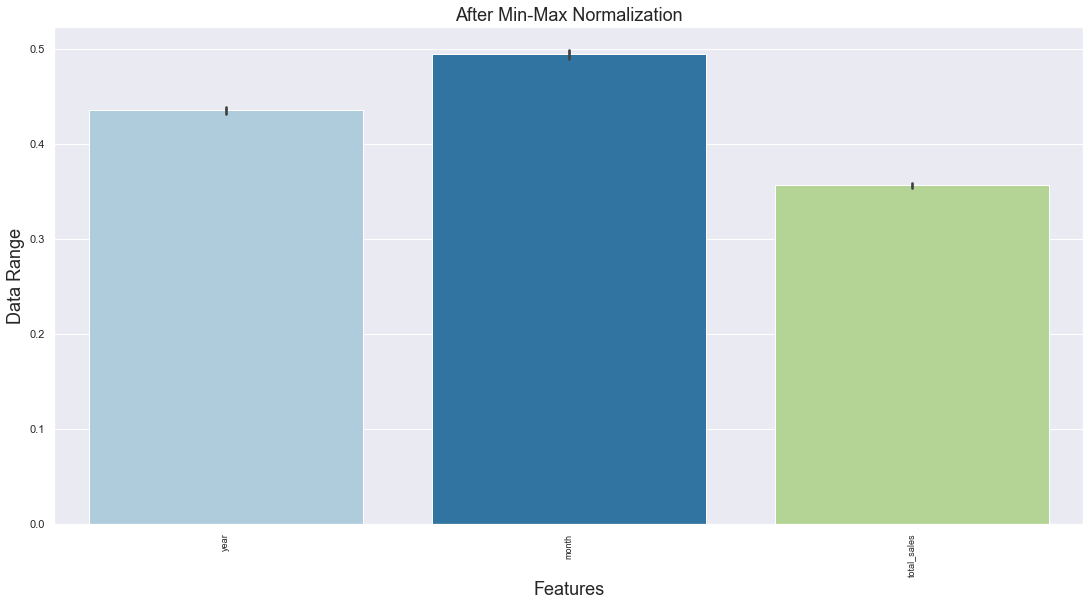

In [33]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=df_min_max_scaled,palette='Paired')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 9)
plt.tight_layout()
plt.xlabel('Features',fontsize=18)
plt.ylabel('Data Range',fontsize=18)
plt.title("After Min-Max Normalization",fontsize=18)
#plt.savefig('Checking for null values')

plt.show()

In [34]:
df4=df['item_id']

In [35]:
df_min_max_scaled["item_id"]=df4

In [36]:
df=df_min_max_scaled

In [37]:
df_min_max_scaled

,year,month,total_sales,item_id
0,0.000000,0.000000,0.092590,I00001
1,0.000000,0.090909,0.200232,I00001
2,0.000000,0.181818,0.210899,I00001
3,0.000000,0.272727,0.279751,I00001
4,0.000000,0.363636,0.190534,I00001
...,...,...,...,...
22435,0.857143,0.727273,0.314957,I00264
22436,0.857143,0.818182,0.497100,I00264
22437,0.857143,0.909091,0.209971,I00264
22438,0.857143,1.000000,0.503425,I00264


# ORDINAL ENCODING

In [38]:
oencoder = OrdinalEncoder()
df['year']=oencoder.fit_transform(df["year"].to_numpy().reshape(-1, 1))
df['month']=oencoder.fit_transform(df["month"].to_numpy().reshape(-1, 1))

In [39]:
df

,year,month,total_sales,item_id
0,0.0,0.0,0.092590,I00001
1,0.0,1.0,0.200232,I00001
2,0.0,2.0,0.210899,I00001
3,0.0,3.0,0.279751,I00001
4,0.0,4.0,0.190534,I00001
...,...,...,...,...
22435,6.0,8.0,0.314957,I00264
22436,6.0,9.0,0.497100,I00264
22437,6.0,10.0,0.209971,I00264
22438,6.0,11.0,0.503425,I00264


# ONE HOT ENCODING

In [40]:
df = df[['year','month','item_id','total_sales']] 
newdf = df
newdf=newdf.iloc[:,:-1]
newdf
newdf=pd.get_dummies(newdf,columns = ['item_id'])

In [41]:
newdf

,year,month,item_id_I00001,item_id_I00002,item_id_I00003,item_id_I00004,item_id_I00005,item_id_I00006,item_id_I00007,item_id_I00008,...,item_id_I00255,item_id_I00256,item_id_I00257,item_id_I00258,item_id_I00259,item_id_I00260,item_id_I00261,item_id_I00262,item_id_I00263,item_id_I00264
0,0.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,4.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22435,6.0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22436,6.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22437,6.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22438,6.0,11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
newdf.dtypes

year              float64
month             float64
item_id_I00001      uint8
item_id_I00002      uint8
item_id_I00003      uint8
                   ...   
item_id_I00260      uint8
item_id_I00261      uint8
item_id_I00262      uint8
item_id_I00263      uint8
item_id_I00264      uint8
Length: 266, dtype: object

In [43]:
df3=df2
# checking features
cat = newdf.select_dtypes(include='O').keys()
# display variabels
cat

Index([], dtype='object')

In [44]:
# unique values in each columns
for x in df.columns:
    #prinfting unique values
    print(x ,':', len(df[x].unique()))

year : 8
month : 12
item_id : 264
total_sales : 4216


In [45]:
X=newdf
y = df.iloc[:,-1]

# Evaluation

In [46]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

# Linear Regression

In [47]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

Intercept: 0.33804378570925425
Root mean squared error:  0.005720731065339401
R2:  0.8559068040551588


In [50]:
regression_model.score(X_test,y_test)

0.8559068040551588

# SVM

In [52]:
from sklearn import svm
regr = svm.SVR(kernel="linear", C=100, gamma="auto")
regr.fit(X_train, y_train)
# Predict
y_predicted = regr.predict(X_test)

In [53]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regr.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

Intercept: [0.34000119]
Root mean squared error:  0.0059377439953953925
R2:  0.8504407043039259


In [54]:
regr.score(X_test,y_test)

0.8504407043039259

<AxesSubplot:xlabel='total_sales'>

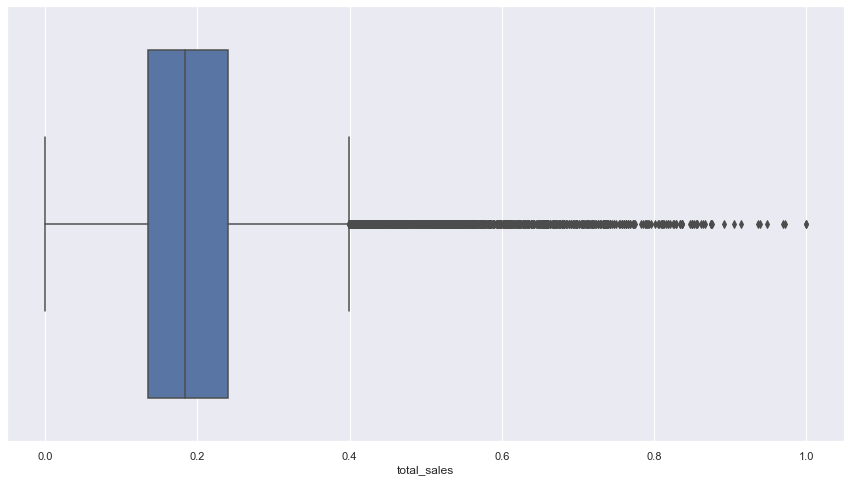

In [165]:
sns.boxplot(y_train)

In [ ]:
Q1 =y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lim1=(Q1 - 1.5 * IQR)
lim2=(Q3 + 1.5 * IQR)

In [171]:
Avg=np.mean(y_train)
for a in len(y_train):
    com=y_train.iloc[a,i]
    if ((com < lim1) |(com > lim2)):
        y_train.iloc[ami,i] = Avg

(17952,)

In [152]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
newdf=df.iloc[:,:-1]
newdf=pd.get_dummies(newdf,columns = ['item_id','month','year'])

In [ ]:
newdf

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

In [ ]:
regression_model.score(X_test,y_test)

In [ ]:
y_predicted = regr.predict(X_test)

In [ ]:
regr.score(X_test,y_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), svm.SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

In [ ]:
y_predicted = regr.predict(X_test)

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
#print('Intercept:', regr.intercept_)
print('Root mean squared error: ', rmse)
print('R2: ', r2)

In [ ]:
regr.score(X_test,y_test)

In [ ]:
df=data

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# summarize the transformed data
print('Input', X.shape)
print(X)

In [ ]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
print(y_train.shape)

In [ ]:
# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(X_train, y_train)
# Predict
y_predicted = regression_model.predict(X_test)

In [ ]:
# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)

In [ ]:
plt.scatter(X_train, y_train)

In [ ]:
print(X_train.size)